# Reaksjonskinetikk og differensialligninger: Eulers metode

## IN-KJM1900 Forelesning, 30.oktober 2018

I reaksjonskinetikk unders?ker vi hvordan hastigheten til en reaksjon (hvor fort konsentrasjonene endres) avhenger av konsentrasjonen. 

I generell kjemi presenteres dette ofte for en generell reaksjon 

$$aA + bB \rightarrow C$$

som

\begin{equation}
\text{rate} = k\left[A\right]^x\left[B\right]^y
\end{equation}

hvor $k$ er en eksperimentelt bestemt ratekonstant,$\left[A\right]$ og $\left[B\right]$ er konsentrasjon av henholdsvis reaktant $A$ og $B$, potensene $x$ og $y$ er eksperimentelt bestemte potenser og til sist $\text{rate}$ er *endringen* i konsentrasjon av reaktantene.

---



Legg merke til at dette egentlig er en differensialligning:

\begin{equation}
\text{rate} = -\frac{d}{dt} C_A(t)?= kC_A(t)^xC_B(t)^y
\end{equation}

Hvor vi definerer konsentrasjon som funksjon av tid $C_M(t) := \left[M\right](t)$.


---

## Eksempel: f?rste ordens reaksjon

Vi ser p? et konkret eksempel: hydrogenperoksid er ustabilt og vil henfalle til vann og oksygengass:

$$2 H_2O_2(aq) \rightarrow 2H_2O(l) + O_2(g)$$

Dette skjer som en s?kalt *f?rste ordens* reaksjon, hvor

$$\text{rate} = k \left[?H_2O_2\right]$$

Som en differensialligning har vi

$$-\frac{d}{dt}C_{H_2O_2}(t)  = k C_{H_2O_2}(t)$$

Om du i utgangspunktet har $C_{H_2O_2}(0) = 10 M$, og vi f?r oppgitt $k=0.03 Ms^{-1}$ (ikke reelle verdier), kan vi regne ut konsentrasjon som funksjon av tid.

Vi f?lger fremgangsm?ten skissert i forelesningen.

## 1. Diskretisering av problemet

Vi diskretiserer tiden ved ? la

$$t \rightarrow t_i = i\cdot \Delta t$$

hvor vi velger tidssteget

$$\Delta t = 0.001 s$$

Dette medf?rer at konsentrasjonen ogs? blir diskretisert i tid:

$$C_{H_2O_2}(t) \rightarrow C_{H_2O_2, i} := C_{H_2O_2}(t_i) =  C_{H_2O_2}(i \cdot \Delta t)$$

Ligningen blir da

$$-\frac{d}{dt}C_{H_2O_2}(t_i)  = k C_{H_2O_2}(t_i)$$

Kodemessig inneb?rer dette i grunn bare ? velge et tidssteg:


In [33]:
dt = 0.001

## 2. Diskretisering av differensialoperatoren

Vi diskretiserer n? differensialoperatoren slik at

$$\frac{d}{dt} \rightarrow \mathbf{D}^+$$

For (den diskrete) ligningen v?r betyr det at

$$-\frac{d}{dt}C_{H_2O_2}(t)  \approx -\mathbf{D}^+C_{H_2O_2}(t_i) =  kC_{H_2O_2}(t_i)$$

slik at vi finner

$$-\frac{C_{H_2O_2}(t_{i+1})- C_{H_2O_2}(t_{i})}{\Delta t} =  kC_{H_2O_2}(t_i)$$

Dette er kun forarbeid, det har ingen kodemessige implikasjoner (enda).

## 3. L?s algebraisk for neste (ukjente) tidssteg

Vi l?ser n? ligningen v?r for det neste tidssteget $C_{H_2O_2}(t_{i+1})$:

$$-\frac{C_{H_2O_2}(t_{i+1})- C_{H_2O_2}(t_{i})}{\Delta t} =  kC_{H_2O_2}(t_i)$$

Multipliser begge sidene med $-\Delta t$:

$$C_{H_2O_2}(t_{i+1})- C_{H_2O_2}(t_{i}) =  -kC_{H_2O_2}(t_i) \Delta t$$

Adder $C_{H_2O_2}(t_{i})$ p? begge sider: 

$$C_{H_2O_2}(t_{i+1}) =  -kC_{H_2O_2}(t_i) \Delta t + C_{H_2O_2}(t_{i})$$

Faktoriser ut $C_{H_2O_2}(t_i)$:

$$C_{H_2O_2}(t_{i+1}) =  (1-k\Delta t) C_{H_2O_2}(t_i)$$

Dette siste uttrykket kalles ofte et *oppdateringsskjema*.

## 4. Implementasjon

Vi kan n? implementere oppdateringsskjemaet som en iterativ l?sningsalgoritme.

Vi benytter initialverdien

 $$C_{H_2O_2}(0) = 10 M$$
 
og reaksjonskonstanten  
 
 $$k=0.03 Ms^{-1}$$

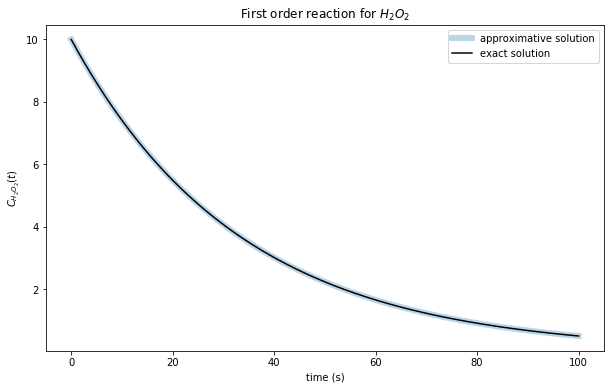

In [45]:
## Implementing forward Euler for first order ODE: y'(t) = -k y(t)

# Import modules
import numpy as np #numpy for numerics

import matplotlib.pyplot as plt #matplotlib for visuals

Nt = 100000 #number of iterations

C_H2O2_t = np.zeros(Nt, dtype = float) #array for the solution

C_H2O2_t[0] = 10.0 #set known initial value

k = 0.03 # Ms^-1 , given constant

for n in np.arange(Nt - 1):
    # Euler iterations: 
    # successively update values in the solution
    # according to the solution scheme derived algebraically
    
    C_H2O2_t[n+1] = (1-k*dt)*C_H2O2_t[n] 
    

# plot results
t = np.arange(Nt)*dt # discrete values for t where C(t) is defined


plt.figure(1, figsize = (10,6)) #name figure and set size
plt.plot(t, C_H2O2_t, label = "approximative solution", linewidth = 6.0, alpha = .3)
plt.plot(t, 10.0*np.exp(-k*t), label = "exact solution", color = (0,0,0))
plt.legend() 
plt.title("First order reaction for $H_2O_2$")
plt.xlabel("time (s)")
plt.ylabel("$C_{H_2O_2}(t)$")
plt.show()

    
